# Bayesian Optimization Tutorial 1

**Prepared by:** [Parisa Toofani Movaghar](https://github.com/ParisaToofani) (ptoofani@nd.edu, 2023)

## 1.	Introduction 

Bayesian optimization is an approach to optimize the objective function that usually takes a long time (minutes or hours) to evaluate like tuning hyperparameters of a deep neural network. Also, many optimization problems in machine learning are black-box optimization problems where the objective function is unknown (black-box function) or we have no information about its derivatives. Thanks to the Bayes theorem, such problems can be handled by developing a Bayesian optimization algorithm. There are many areas where Bayesian optimization (BO) can be a handy tool. To make an example BO has been widely used to design engineering systems (system identification) and choose laboratory experiments in materials (model selection). But this is not the only place that BO can be helpful. In computer science they are widely used in A/B testing, recommender system, robotics and reinforcement learning, environmental monitoring and sensor networks, preference learning and interactive interfaces, and tuning the hyperparameters in deep neural networks. As can be seen, BO is a class of machine-learning-based optimization algorithms that focuses on solving problems by inferring the data. But as an engineer, we should know where the best place is to use BO for our problems.

### 1.1.    When We Need Bayesian Optimization?

* The BO algorithm works well on the problem where the input dimension is not too large. It is recommended to use this algorithm for problems with dimensions less than 20.

* The objective function is continuous. We will see later that this is an assumption for the implementation of the Gaussian process (GP).

* Cost matters! The function that we need to optimize is expensive to evaluate. For instance, it requires lots of iterations while our system is limited in performance (computationally cost). On the other hand, the implementation requires purchasing cloud computing environments while our budget is limited (budget limitation).

* The objective function has one of the following problems: 1) the function is unknown (black box), 2) the derivatives unknown or difficult to calculate, and 3) the function is non-convex.

* We are looking for the global optimum, not the local one.


### 1.2.  Parametric vs. Nonparametric in Bayesian Optimization

A Bayesian Optimization is an approach that uses Bayes Theorem to direct the search in order to find the minimum or maximum of an objective function. The most efficacy of the Bayesian optimization is in the black box system in which the parameter of the model is unknown (nonparametric Bayesian optimization (NBO)). But imagine that I have a beam whose characteristics are defined by stiffness, elasticity, and the applied load (more simply imagine we have a model with a, b, and c variables). Further, the goal is to find these variables in a way that the beam deflection is minimum. If we consider our model uncertain, this is another place that BO comes to help. In other words, due to the uncertainty that exists in our model, we infer our model to find the variables that describe our model well. This case is defined as the parametric Bayesian optimization (PBO). 

### 1.2.1.	Parametric Bayesian Optimization (PBO)

In order to define the Bayesian optimization with parametric models, we consider a generic family of models parametrized by w. Imagine we have a set of data $(D)$. Since w is an unobserved quantity, we consider it as a latent random variable that has a prior distribution named $p(w)$. Given a data D and defining the likelihood model as $p(D|w)$, we can then infer a posterior distribution $p(w|D)$ using the Bayes theorem.

$$p(w│D)=\frac{(p(D│w)p(w))}{(p(D))}	\quad \quad(1)$$

The posterior represents the updated beliefs about the model parameters after observing the data $(D)$. The denominator correspondent with the marginal likelihood (evidence in literature) which is usually difficult to evaluate. This problem is considered a fully Bayesian approach. 

### 1.2.2.	Nonparametric Bayesian Optimization (NBO)

The NBO is rooted in two components: 1) a Bayesian statistical model for modeling the objective function (surrogate) and 2) an acquisition function for deciding where to sample next. The mathematics here is going to be a little bit complex. We will use a space-filling experimental design to evaluate the objective function. Then we will perform the iterative calculations to allocate the remainder of a budget of N functions evaluations. Here, the surrogate model is defined as a Gaussian process (GP) that provides the Bayesian posterior probability distribution that describes the potential value for $f(x)$ at the determined point x. Following this, the acquisition function measures the x value at the next step based on the current posterior evaluation.

## 2.	Method

### 2.1. Nonparametric Bayesian Optimization

In this part, we will see how we can generalize the concept of PBO to NBO in order to optimize our favorite black box. This can be done by marginalizing away the weights in Bayesian linear regression and applying the kernel trick to construct a Bayesian nonparametric regression model. By kernelizing a marginalized version of Bayesian linear regression what we have already done is construct an object called a Gaussian process (GP) which we will discuss in the next part.

**___________________________________________**

  **Algorithm:** Bayesian Optimization
  
**___________________________________________**  
1. Define the search space of the objective function
2. Initialize the set of sampled points $D = []$
3. Specify the number of iterations $t$
4. for i = 1 to t do
5.    Fit a Gaussian process model to the data in D
6.    Use an acquisition function (e.g., expected improvement) to propose a new point $x^*$
7.    Evaluate the objective function at $x^*$
8.    Add the new point and its objective value to $D$
9. end for
10. Return the best-observed value in $D$

**___________________________________________**

### 2.2. Gaussian Process



The Gaussian process is a nonparametric model that is characterized by its prior mean function ($μ_0$) and its positive definite kernel (covariance) function ($Σ_0$) over the function space. The interesting thing about the  $Σ_0$ is that it is constructed at each pair of points $x_i$ and $x_j$. Therefore, if the points $x_i$ and $x_j$ are close to each other in the input space, they would have a larger positive correlation which put emphasis on the belief that they have more similar function values.
The prior distribution over the functions $[f(x_1 ),f(x_2 ),…,f(x_n )]$ is defined as:

$$f≈\mathcal{N}\left(\left[\begin{matrix}\mu(x_1)\\\vdots\\\mu\left(x_n\right)\\\end{matrix}\right],\ \left[\begin{matrix}\Sigma_0(x_1,x_1)&\ldots&\Sigma_0(x_1,x_n)\\\vdots&\ddots&\vdots\\\Sigma_0(x_n,x_1)&\ldots&\Sigma_0(x_n,x_n)\\\end{matrix}\right]\right)≈GP\left(\underset{{Mean}}{{\underbrace{\mu\left(x_{1:n}\right)}}}\ ,\underset{Kernel}{\underbrace{\Sigma_0(x_{1:n},x_{1:n})}}\ \right) \quad\quad	(2)$$


Let’s go one step further and include some data in the problem. Imagine the observation is defined as $D_n={[(x_i,f(x_i)]}_{i=1}^n$. As defined previously, the random variable $f(x)$ conditioned on observations $D_n$ is also normally distributed when kernelizing linear regression. Such a conditioned function is correspondent to the posterior which has the mean of $μ_n$ and $σ_n^2$ which is defined as follows:

$$μ_n (x)=Σ_0 (x,x_{1:n} ) [[Σ_0(x_{1:n},x_{1:n} )+σ^2 I]]^{-1} (f(x_{1:n} )-μ(x_{1:n} ))+μ(x)  \quad\quad	(3)$$

$$σ_n^2 (x)=Σ_0 (x,x)-Σ_0 (x,x_{1:n} ) [[Σ_0 (x_{1:n},x_{1:n} )+σ^2 I]]^{-1} Σ_0 (x_{1:n},x)  \quad\quad	(4)$$


Where $Σ_0 (x,x_{1:n} )$ is a vector of covariance terms between $x$ and $x_{1:n}$. The posterior mean and variance evaluated at any point x represent the model prediction and uncertainty, respectively, in the objective function at the point $x$. The posterior functions are used to select the next query point $x_{n+1}$.

### 2.2.1.	The prior mean function

The prior mean function provides a possibles a possible offset. In most cases, this function is set to be a constant ($μ(x)≡μ$). However, when $f$ is believed to have a trend or some application specific parametric structure, we could define the mean function to be:

$$μ(x)=μ+∑_{i=1}^pβ_i ψ_i (x)	\quad \quad(5)$$

Where each $\psi_i(x)$ is a parametric function, and often a low-order polynomial in $x$.

### 2.2.2.	The Choice of Kernel in Gaussian Process

One of the most important components of BO is the covariance (kernel) function which dictates the structure of the response functions that we can fit. To make an example, if we expect the response function to be periodic, we can use periodic kernels. Kernels usually are defined as the points closer in the input space that are more strongly correlated. In addition, kernels should be positive-semi definite. Different types of kernels can be defined as follows:

a)	Laplacian function: this function provides a continuous and non-differentiable kernel function. In this case, if you average over your samples, you will get a straight line called Brownian bridges.

$$\Sigma_0=\sigma_f^2\exp{\left(-\frac{1}{2l^2}\left|\left|x_i-x_j\right|\right|\right)} \quad \quad (6)$$

b)	Power exponential or Gaussian kernel:

$$\Sigma_0=\sigma_f^2\exp{\left(-\frac{1}{2l^2}\left|\left|x_i-x_j\right|\right|^2\right)} \quad \quad (7)$$

c)	Rational Quadratic:

$$\Sigma_0=\sigma_f^2\exp{\left(1+\frac{1}{2\alpha l^2}\left|\left|x_i-x_j\right|\right|^{2}\right)^{-\alpha}} \quad \quad (8)$$

d)	Periodic function:

$$\Sigma_0=\sigma_f^2\exp \left( -2 \sin^2 \left( \frac{\pi \| x_i - x_j \|}{\omega} \right) / l^2 \right) \quad \quad (9)$$

e)	Matern kernel: Matern kernels are a flexible class of stationary kernels. The main parameter to characterize these kernels is $\nu>0$ which defines the smoothness. The following shows the formulation of famous Matern kernels.

$$\Sigma_{0_{Mattern1}}=\sigma_f^2\exp{\left(-\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)} \quad \quad (10)$$

$$\Sigma_{0_{Mattern3}}=\sigma_f^2\exp{\left(-\sqrt3\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)}\left(1+\sqrt3\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right) \quad \quad (11)$$

$$\Sigma_{0_{Mattern5}}=\sigma_f^2\exp{\left(-\sqrt5\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)}\left(1+\sqrt5\sqrt{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}+\frac{5}{3}\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)\right) \quad \quad (12)$$

$$\Sigma_{0_{Mattern_{exp}}}=\sigma_f^2\exp{\left(-\frac{1}{\left(x_i-x_j\right)^Tl\left(x_i-x_j\right)}\right)} \quad \quad (13)$$


In [1595]:
# =============================================
# Importing all required libraries
# =============================================
import math
import time
import random
import matplotlib
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.gaussian_process import GaussianProcessRegressor
from mpl_toolkits.axes_grid1 import make_axes_locatable
from warnings import catch_warnings
from warnings import simplefilter
from IPython.display import Image
from matplotlib import cm
from tqdm import tqdm

In [1596]:
# =============================================
# Creating an object-oriented model to calculate 
# the various kernel functions
# =============================================
class GpKernels:
  # Model initialization
  def __init__(self, xa, xb, sigmaf=1, l=1):
    """
    Define basic model parameters that are the same in the whole model
    Inputs:
        xa: sample observation (point a)
        xb: sample observation (point b)
        sigmaf: (model hyperparameter) vertical scale (the overall variance) -> default value = 1
        l: (model hyperparameter) horizontal scale (the lengthscale) -> default value = 1
    Outputs:
        Nothing   
    """
    self.xa = xa
    self.xb = xb
    self.sigmaf = sigmaf
    self.l = l
    
  # Define the Laplacian function 
  def laplaciankernel(self):
    """
    Finding the Kernel using the Laplacian function
    Inputs:
        self: include all model parameters in __init__ function
    Outputs:
        kernel values   
    """
    diiff = np.sqrt(sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean'))
    sq_norm = -0.5 * np.abs(diiff) # L1 distance
    return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))

  # Define the power exponential or Gaussian kernel 
  def gausskernel(self):
    """
    Finding the Kernel using the power exponential or Gaussian function
    Inputs:
        self: include all model parameters in __init__ function
    Outputs:
        kernel values   
    """
    sq_norm = -0.5 * sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean') # L2 distance (Squared Euclidian)
    return (self.sigmaf**2)*np.exp(sq_norm/(self.l**2))

  # Define the Rational Quadratic function
  def rationalquadkernel(self, alpha):
    """
    Finding the Kernel using the Rational Quadratic function
    Inputs:
        self: include all model parameters in __init__ function
        alpha: (model hyperparameter) the scale-mixture>0
    Outputs:
        kernel values   
    """
    sq_norm = -0.5 * np.abs(np.sqrt(sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean')))
    return (self.sigmaf**2)*np.power(np.exp(1+np.power(sq_norm, 2)/(alpha*(self.l**2))), -alpha)

  # Define the Periodic function 
  def periodickernel(self, freq):
    """
    Finding the Kernel using the Periodic function
    Inputs:
        self: include all model parameters in __init__ function
        freq: the period or the distance between repetitions
    Outputs:
        kernel values   
    """
    diiff = np.sqrt(sp.spatial.distance.cdist(self.xa, self.xb, 'sqeuclidean'))
    sq_norm = np.abs(diiff)
    return (self.sigmaf**2)*np.exp(-2*np.power(np.sin(sq_norm * np.pi/freq),2)/(self.l**2))

# =============================================
# Creating an object-oriented model to implement 
# the Gaussian Process model
# =============================================
class GaussianProcess:
  def __init__(self, mu = None, sigma = None):
    """
    Define basic model parameters that are the same in the whole model
    Inputs:
        mu: prior mean function
        sigma: prior positive definite kernel (covariance) function
    Outputs:
        Nothing   
    """
    self.mu = mu
    self.sigma = sigma

  def gpprior(self, realization):
    """
    Finding the samples from the prior
    Inputs:
        self: include all model parameters in __init__ function
        realization: number of the samples to generate (number of functions to sample)
    Outputs:
        samples from the prior at data points   
    """
    return np.random.multivariate_normal(self.mu, self.sigma, realization)

  def gpposterior(self, X1, y1, X2, kernel_func):
    """
    Finding the posterior mean and covariance
    Inputs:
        self: include all model parameters in __init__ function
        X1: sample observation (randomly generated)
        X2: predicted points (randomly generated)
        y1: sample observation values (calculated using the objective function and X1)
        kernel_func: pre-defined object-oriented class (to define the kernel function)
    Outputs:
        muPOST: posterior mean
        sigmaPOST: posterior covariance
    """
    # !!! Important: here we assume that the prior mean is equal to zero
    # Kernel of the noisy observations
    # The kernel type is defined to be Gaussian (all other types can be used)
    # Kernel between observations and observations
    sigma11 = kernel_func(X1, X1).gausskernel()
    # Kernel between observations and predictions
    sigma12 = kernel_func(X1, X2).gausskernel()
    # Kernel between predictions and predictions
    sigma22 = kernel_func(X2, X2).gausskernel()
    # Solve
    # pos --> positive definite
    solved = sp.linalg.solve(sigma11, sigma12, assume_a='pos').T
    # Compute the posterior mean
    muPOST = solved @ y1
    # Compute the posterior covariance
    sigmaPOST = sigma22 - (solved @ sigma12)
    return muPOST, sigmaPOST 


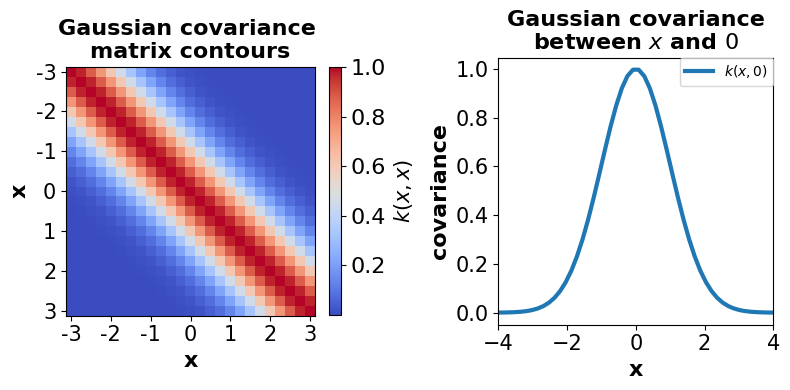

In [1597]:
# =============================================
# Creating an illustration for the covariance matrix 
# =============================================
# Start plotting
# The size is set to be (8,4) for capturing a better illustration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(8,4))
# Define a limitation for x values
xlim = (-3, 3)
# Expand the shape of an array
X = np.expand_dims(np.linspace(*xlim, 25), 1)
# Define a covariance matrix using gaussian kernel
Sigma = GpKernels(X, X).gausskernel()
# Plot covariance matrix
im = ax1.imshow(Sigma, cmap=cm.coolwarm)
cbar = plt.colorbar(im, ax=ax1, fraction=0.045, pad=0.05)
# Set plots attributes
# title 
ax1.set_title(('Gaussian covariance \n'
              'matrix contours'), fontsize=16, fontweight = 'bold')
# labels and ticks
cbar.ax.tick_params(labelsize=16) 
cbar.ax.set_ylabel(r'$k(x,x)$', fontsize=15)
ax1.set_xlabel('x', fontsize=16, fontweight='bold')
ax1.set_ylabel('x', fontsize=16, fontweight='bold')
ticks = list(range(xlim[0], xlim[1]+1))
ax1.set_xticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_yticks(np.linspace(0, len(X)-1, len(ticks)))
ax1.set_xticklabels(ticks)
ax1.set_yticklabels(ticks)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
# Grid
ax1.grid(False)
# Plot covariance with X=0 and X -> marginalizing
# Define a limitation for x values
xlim = (-4, 4)
# Expand the shape of an array
X = np.expand_dims(np.linspace(*xlim, num=50), 1)
# Define array of zero (X=0)
zero = np.array([[0]])
# Define a covariance matrix using gaussian kernel
Sigma0 = GpKernels(X, zero).gausskernel()
# Plot marginal
ax2.plot(X[:,0], Sigma0[:,0], linewidth=3, label=r'$k(x,0)$')
# Set plots attributes
# title 
ax2.set_title((
    'Gaussian covariance\n'
    'between $x$ and $0$'), fontsize=16, fontweight = 'bold')
# labels and ticks
ax2.set_xlabel('x', fontsize=16, fontweight='bold')
ax2.set_ylabel('covariance', fontsize=16, fontweight='bold')
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_xlim(*xlim)
# legends
ax2.legend(fontsize=10,loc = 1, borderaxespad=0)

fig.tight_layout()
plt.show()

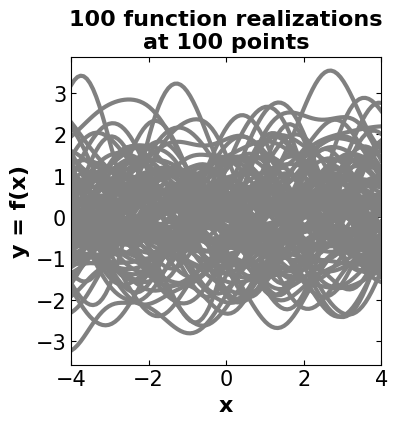

In [1598]:
# =============================================
# Creating an illustration for drawn samples
# from the Gaussian process distribution
# =============================================
# Number of points in each function
nb_of_samples = 100  
# Number of functions to sample
number_of_functions = 100  
# Independent variable samples with specific limitations
# Expand the shape of an array
X = np.expand_dims(np.linspace(-4, 4, nb_of_samples), 1)
# Generate the Gaussian kernel (covariance matrix)
Σ = GpKernels(X, X).gausskernel()  
# Start drawing samples from the prior
# !!! The mean is set to be zero
ys = GaussianProcess(mu=np.zeros(nb_of_samples), sigma=Σ).gpprior(number_of_functions)
# Plot the sampled functions (realizations) -> prior
# Define a plot size
priorfig = plt.figure(figsize=(4, 4))
# title
plt.title(('100 function realizations\n' 
              'at 100 points'), fontsize=16, fontweight = 'bold')
# generating the line plots using all iterations results
for i in range(number_of_functions):
    plt.plot(X, ys[i], color = 'gray', linestyle='-', linewidth=3)
# define a and y axis labels
plt.xlabel('x', fontsize=16, fontweight='bold')
plt.ylabel('y = f(x)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
# define a limit on xaxis
plt.xlim([-4, 4])
plt.show()

In [1599]:
# =============================================
# Generating samples from the posterior
# =============================================
# Define the actual function (here, a periodic function (cosine) is used)
f_cos = lambda x: (np.cos(x)).flatten()
n1 = 8  # Training points (used in conditioning)
n2 = 100  # Test points in the posterior
ny = 100  # Number of functions that will be sampled from the posterior
domain = (-6, 6) # Define a specific domain
# Sample observations (randomly generated)
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1))
# Sample observations value (using the objective function)
y1 = f_cos(X1)
# Predicted points (randomly generated)
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# Finding the mean and covariance of the posterior using the Gaussian process
# !!! It is important to note that prior kernel is set to be a Gaussian kernel
mu2, Sigma2 = GaussianProcess().gpposterior(X1, y1, X2, GpKernels)
# Compute the standard deviation at the test points
# -> used in defining intervals
σ2 = np.sqrt(np.diag(Sigma2))
# Randomly generated samples for posterior using 
#multivariate Normal distribution
y2 = np.random.multivariate_normal(mean=mu2, cov=Sigma2, size=ny)

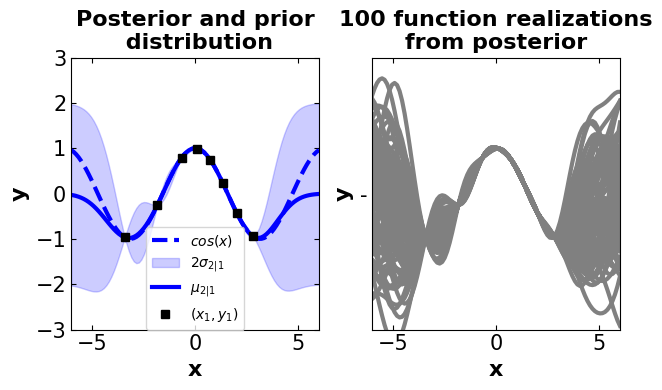

In [1600]:
# =============================================
# Creating an illustration for drawn samples
# from the posterior
# =============================================
# Define a main plot size and attributes
fig2, (ax12, ax22) = plt.subplots(
    nrows=1, ncols=2, figsize=(6.4, 4))

# set plot properties once so they can be easily changed later
mrk_siz = 8 # set markersize
lin_wdth = 3 # set linewidth
shade_intensity = 0.2 # set shade intensity

# title (subplot1)
ax12.set_title(('Posterior and prior\n'
                ' distribution'), fontsize=16, fontweight='bold')
# plot objective function (using predicted points)
ax12.plot(X2, f_cos(X2), 'b--', lw=lin_wdth, label='$cos(x)$')
#plot the intervals
ax12.fill_between(X2.flat, mu2-2*σ2, mu2+2*σ2, color='blue', 
                 alpha=shade_intensity, label='$2 \sigma_{2|1}$')
# plot the mean
ax12.plot(X2, mu2, 'b-', lw=lin_wdth, label='$\mu_{2|1}$')
# plot the randomly generated sample points (training)
ax12.plot(X1, y1, 'ks', linewidth=mrk_siz, label='$(x_1, y_1)$')
# set label attributes
ax12.set_xlabel('x', fontsize=16, fontweight='bold')
ax12.set_ylabel('y', fontsize=16, fontweight='bold')
ax12.axis([domain[0], domain[1], -3, 3])
# adjust tick sizes
ax12.xaxis.set_tick_params(labelsize=15, direction="in",top=True, right=True)
ax12.yaxis.set_tick_params(labelsize=15, direction="in",top=True, right=True)
ax12.legend(fontsize=10,loc = 'lower center',borderaxespad=0)

# Plot samples from this function
ax22.set_title(('100 function realizations\n'
                'from posterior'), fontsize=16, fontweight='bold')
# plot posterior realizations
ax22.plot(X2, y2.T, 'gray', '-', linewidth=3)
# set label attributes
ax22.set_xlabel('x', fontsize=16, fontweight='bold')
ax22.set_ylabel('y', fontsize=16, fontweight='bold')
# adjust tick sizes
ax22.xaxis.set_tick_params(labelsize=15, direction="in",top=True, right=True)
ax22.yaxis.set_tick_params(labelsize=15, direction="in",top=True, right=True)
# define domain
ax22.axis([domain[0], domain[1], -3, 3])
ax22.set_xlim([-6, 6])
# adjust subplots
plt.subplots_adjust(top = 0.92, wspace = 0.12, hspace = 0.08)
plt.tight_layout()
plt.show()

### 2.3. Acquisition Function

Proposing sampling points in the search space is done by acquisition functions. They trade off exploitation and exploration. Exploitation means sampling where the surrogate model predicts a high objective and exploration means sampling at locations where the prediction uncertainty is high. Both correspond to high acquisition function values and the goal is to maximize the acquisition function to determine the next sampling point. There are two famous approaches to implementing the acquisition function named “probability of improvement (PI)” and “expected improvement (EI)”. But before getting to each algorithm let’s define what is the improvement. Imagine the objective function that we defined is $f(x)$ and the current observe point is defined as $x^*$, then the improvement function $I(x)$ is defined as follows:

$$I(x)=max⁡(f(x)-f(x^* ),0) \quad \quad (14)$$

### 2.3.1.	Probability of Improvement (PI)

As we are using the GP, we know that at every point of observation, we apply a Gaussian distribution. Therefore, at point x the value of the function f(x) is sampled from the normal distribution with mean μ(x) and variance of the σ^2 (x). Finally, the probability of improvement is defined as:

$$PI(x)=1-ϕ(z_0 )=ϕ(-z_0 )=ϕ((μ(x)-f(x^* ))/σ(x) ) \quad \quad (15)$$

In [1601]:
# Define the function of the probability improvement
def probability_improvement(model, X, Xsamples):
    """
    Finding the probability improvement
    Inputs:
        model: pre-defined surrogate model 
        X: observation data
        Xsamples: randomly generated samples using random search
    Outputs:
        pi: probability of improvement
        
    !!! Important note: 
        1- the surrogate model should be defined 
        using the models provided by the Scikit-learn 
        (like GaussianProcessRegressor), otherwise, it will not
        work.
        2- 1E-9 added in pi formulation is called jitter, and
        it is used to avoid numerical problems.
    """
    # calculate mean and stdev via surrogate function
    mu, std = model.predict(Xsamples, return_std=True)
    # start prediction using surrogate model
    yhat = model.predict(X)
    # find the best score
    best = max(yhat)
    # calculate the probability of improvement
    pi = sp.stats.norm.cdf((mu - best) / (std+1E-9))
    return pi

### 2.3.2.	Expected Improvement (EI)

PI only considers the probability of the point at the current step. However, the effect of the higher moments can affect the improvement (magnitude of improvement). To solve such a problem, the expected improvement is defined as follows:

$$EI(x)≡E[I(x)]=∫I(x)ϕ(z)dz→ϕ(z)=1/√{2π}  exp⁡(-z^2/2)   \quad \quad (16)$$

$$EI\left(x\right)=\int_{z_0}^{\infty\ \ }{max\left(f\left(x\right)-f\left(x^\ast\right),0\right)\phi\left(z\right)dz=}\int_{z_0}^{\infty\ \ }\left(\mu+\sigma z-f\left(x^\ast\right)\right)\phi\left(z\right)dz=\int_{z_0}^{\infty\ \ }\left(\mu-f\left(x^\ast\right)\right)\phi\left(z\right)dz+\int_{z_0}^{\infty\ \ }{\sigma\ z\ \frac{1}{\sqrt{2\pi}}\ e^{\left(-\frac{z^2}{2}\right)}dz}=\left(\mu-f\left(x^\ast\right)\right)\int_{z_0}^{\infty\ \ }\phi\left(z\right)dz+\sigma\frac{1}{\sqrt{2\pi}}\int_{z_0}^{\infty\ \ }{z\ e^{\left(-\frac{z^2}{2}\right)}dz}=\left(\mu-f\left(x^\ast\right)\right)\left(1-\Phi\left(z_0\right)\right)+\sigma\phi\left(z_0\right)=\left(\mu-f\left(x^\ast\right)\right)\Phi\left(\frac{\mu-f\left(x^\ast\right)}{\sigma}\right)+\sigma\phi\left(\frac{\mu-f\left(x^\ast\right)}{\sigma}\right) \quad \quad (17)$$

In [1602]:
# Define the function of the expected improvement
def expected_improvement(model, X, X_sample, xi=0.01):
    """
    Finding the expectation of improvement
    Inputs:
        model: pre-defined surrogate model 
        X: observation data
        Xsamples: randomly generated samples using random search
        xi: exploitation-exploration trade-off parameter (default = 0.01)
    Outputs:
        ei: expectation of improvement
        
    !!! Important note: 
        1- the surrogate model should be defined 
        using the models provided by the Scikit-learn 
        (like GaussianProcessRegressor), otherwise, it will not
        work.
    """
    # calculate mean and stdev via surrogate function
    mu, sigma = model.predict(X_sample, return_std=True)
    
    # start prediction using surrogate model
    mu_sample = model.predict(X)
    # find the best score
    mu_sample_opt = max(mu_sample)

    with np.errstate(divide='warn'):
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        # calculate the expectation of improvement
        ei = imp * sp.stats.norm.cdf(Z) + sigma * sp.stats.norm.pdf(Z)
    return ei

## 3.	Implementing the Bayesian Optimization from scratch

Now it is the time to put all components together, here, step by step, the Bayesian optimization is implemented using a simple function.

Here, instead of using our 1D Gaussian Process model, we will use the Gaussian process module provided by Scikit-learn.

The model that is used to be optimized is the Ackley function.

The Ackley function is a commonly used benchmark function in optimization and machine learning. It is a multimodal function that is often used to test the performance of optimization algorithms, including Bayesian optimization. The Ackley function is characterized by a large number of local minima and a relatively flat global minimum. This makes it a challenging optimization problem for many algorithms. The Ackley function is typically defined as a two-dimensional function, but it can be easily reduced to one dimension by fixing one of the input variables.


$$f(x) = -20 \exp\left(-0.2 \sqrt{0.5 x^2}\right) - \exp\left(0.5 \cos(2\pi x)\right) + 20 + \exp(1)
 \quad\quad (18)$$

In [1603]:
# !!! This function will be utilized later to demonstrate  the convergence 
# and evaluation of the Bayesian model in each step
# define a plot function to observe the function behavior per iterations
def plot_converg_iter(X_sample, Y_sample, n_init=2):
    """
    Defining a plot function to observe the function behavior per iteration
    Inputs:
        X_sample: calculated x per iterations
        Y_sample: estimated values
        n_init: skip the first n_init number of samples
                (initialization steps in algorithms)
    Outputs:
        convergence plots
    """
    # Define the main figure size
    plt.figure(figsize=(6.4, 4))
    # Remodify samples for plotting (flattening)
    x = X_sample[n_init:].ravel()
    y = Y_sample[n_init:].ravel()
    # define the number of iterations without initialization
    r = range(1, len(x)+1)
    # find the distance between points
    x_neighbor_dist = [np.abs(a-b) for a, b in zip(x, x[1:])]
    # create cumulative using the maximization
    y_max_watermark = np.maximum.accumulate(-y)
    
    plt.subplot(1, 2, 1)
    # title
    plt.title(('Distance between \n'
               'consecutive x\'s'), fontsize=16, fontweight='bold')
    # plot the distance between points per iteration
    plt.plot(r[1:], x_neighbor_dist, 'bo-', linewidth=3, markersize=8)
    # adjust labels
    plt.xlabel('Iteration', fontsize=16, fontweight='bold')
    plt.ylabel('Distance', fontsize=16, fontweight='bold')
    # adjust tick sizes
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tick_params(direction="in",top=True, right=True) 

    plt.subplot(1, 2, 2)
    # title
    plt.title('Value of best \n'
              'selected sample', fontsize=16, fontweight='bold')
    # plot model evaluations per iterations
    plt.plot(r, -y_max_watermark, 'ro-', linewidth=3, markersize=8)
    # adjust label
    plt.xlabel('Iteration', fontsize=16, fontweight='bold')
    plt.ylabel('Best Y', fontsize=16, fontweight='bold')
    # adjust tick sizes
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tick_params(direction="in",top=True, right=True)    
    plt.tight_layout()
    plt.show() 

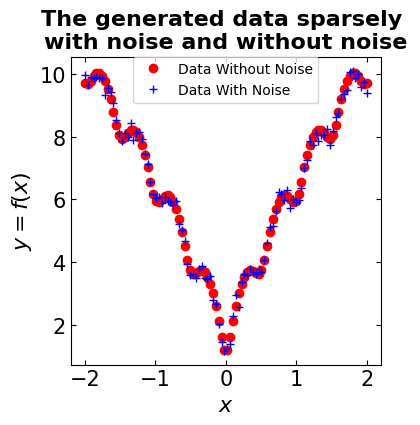

In [1604]:
# =============================================
# Step 1: Define the objective function
# =============================================
# Define an objective function
def objectivefunction(x, noise=0.3, opt_type='Minimization'):
    """
    Defining objective function
    Inputs:
        x: samples from a specific domain
        noise: standard deviation integrated in 
               white noise (random Normal)
        opt_type: define if the algorithm should consider the
                  problem as a minimization or maximization
    Outputs:
        objective function with/out noise (trigonometric)
    """
    a = 20 # constant values
    b = 0.2 # constant values
    c = 2*np.pi # constant values
    term1 = -a*np.exp(-b*np.sqrt(0.5*(x**2)))
    term2 = -np.exp(0.5*(np.cos(c*x)))
    # add noise to the model 
    whitenoise = np.random.normal(loc=0, scale=noise)
    if opt_type == 'Minimization':
        return (term1 + term2 + a + np.exp(1) + whitenoise)
    else:
        return -1*(term1 + term2 + a + np.exp(1) + whitenoise)

# sample the domain sparsely with noise and without noise
X_observed = np.linspace(-2, 2, 100)
y_observed = np.asarray([objectivefunction(x, noise=0.2) for x in X])
y_observed_without_noise = np.asarray([objectivefunction(x, noise=0) for x in X])

# Plot the observation
plt.figure(figsize=(4, 4))
# title
plt.title(('The generated data sparsely \n'
           'with noise and without noise'), fontsize=16, fontweight='bold')
# plot data without noise
plt.plot(X_observed, y_observed_without_noise, 'ro', linewidth=8, label='Data Without Noise')
# plot data with noise
plt.plot(X_observed, y_observed, 'b+', linewidth=8, label='Data With Noise')
# define labels attributes
plt.xlabel('$x$', fontsize=16, fontweight='bold')
plt.ylabel('$y = f(x)$', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
# adjust legends
plt.legend(fontsize=10,borderaxespad=0)
plt.show()

In [1605]:
# =============================================
# Import model-specific libraries (from Scikit-learn)
# =============================================
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern
# =============================================
# Step 2: Define the Gaussian process model
# =============================================
"""
Models description:
-----------------------------------
Src: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html
GaussianProcessRegressor:
1- kernel: kernel instance, default=None
2- alpha: float or ndarray of shape (n_samples,), default=1e-10
-----------------------------------
Src: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.ConstantKernel.html
ConstantKernel:
constant_value: float, default=1.0
-----------------------------------
Src: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Matern.html
Matern:
length_scale: float or ndarray of shape (n_features,), default=1.0
nu: float, default=1.5
The parameter nu controls the smoothness of the learned function.
"""
# initialize the model
# define specific X and y values for custom Bayesian model
#----------------------------------------------------------------------------
# !!! for solving the Bayesian model (using custom function) we need to inverse 
# the problem and turn it to maximization to be able to catch the global optimal point
#----------------------------------------------------------------------------
X_bo_custom = np.linspace(-2, 2, 5)
y_bo_custom = -np.asarray([objectivefunction(x, noise=0.2) for x in X_bo_custom])
# reshape into rows and cols
X_bo_custom = X_bo_custom.reshape(len(X_bo_custom), 1)
y_bo_custom = y_bo_custom.reshape(len(y_bo_custom), 1)
noise=0.2
m52 = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr_bo = GaussianProcessRegressor(kernel=m52, alpha=noise**2)
# fit the model
gpr_bo.fit(X_bo_custom, y_bo_custom)

GaussianProcessRegressor(alpha=0.04000000000000001,
                         kernel=1**2 * Matern(length_scale=1, nu=2.5))

In [1606]:
# =============================================
# Step 3: Perform the optimization process
# =============================================
# Defining the optimization for acquisition function
def opt_acquisition(Xsamples, X, y, surrogate, algorithm):
    """
    Defining the optimization for acquisition function
    Inputs:
        Xsamples: generated samples per iteration
        X: observed samples 
        y: observed samples values
        surrogate: surrogate model (Gaussian process)
        algorithm: probability improvement or expectation improvement
    Outputs:
        the sample corresponds to the best score
    """
    # calculate the acquisition function
    scores = algorithm(surrogate, X, Xsamples)
    # find the index of best score
    ix = np.argmax(scores)
    return Xsamples[ix, 0]

# Add timer to catch the calculation runtime
t1 = time.time()
# Define lists to capture the output of the model
f_actual = [] # actual values of the model
estimated_values = [] # estimated values using Gaussian process
x_per_iteration = [] # calculated x per iterations
# start an iteration
for i in tqdm(range(100)):
    # generate samples
    X_samples_bo = np.random.random(100)
    # reshape samples to get the exact dimension
    X_samples_bo = X_samples_bo.reshape(len(X_samples_bo), 1)
    # select the next point to sample
    x = opt_acquisition(X_samples_bo, X_bo_custom, y_bo_custom, gpr_bo, expected_improvement)
    # sample the point
    actual = objectivefunction(x, opt_type='Maximization')
    # summarize the finding
    est, _ = gpr_bo.predict([[x]], return_std=True)
    f_actual.append(actual)
    estimated_values.append(est)
    x_per_iteration.append(x)
    # add the data to the dataset
    X_bo_custom = np.vstack((X_bo_custom, [[x]]))
    y_bo_custom = np.vstack((y_bo_custom, [[actual]]))
    # update the model
    gpr_bo.fit(X_bo_custom, y_bo_custom)
    
t2 = time.time()
print("Run time is: ", t2-t1)

100%|██████████| 100/100 [00:05<00:00, 17.33it/s]

Run time is:  5.780000925064087


In [1607]:
# =============================================
# Step 4: Demonstrate the calculated results
# =============================================
# Find the index of the best-calculated value
ix = np.argmax(y_bo_custom)
print("============================================\n")
print("The optimal point is: ", X_bo_custom[ix][0])
print("============================================\n")
# As we inverse the problem (turn minimization to maximization)
# it is necessary  to multiply the model evaluations by -1 
print("The optimal value is: ", -y_bo_custom[ix][0])
print("============================================\n")
print("Run time is:  %s" %(t2-t1))
print("============================================\n")


The optimal point is:  0.006255250376929866

The optimal value is:  0.29083370411817233

Run time is:  5.780000925064087



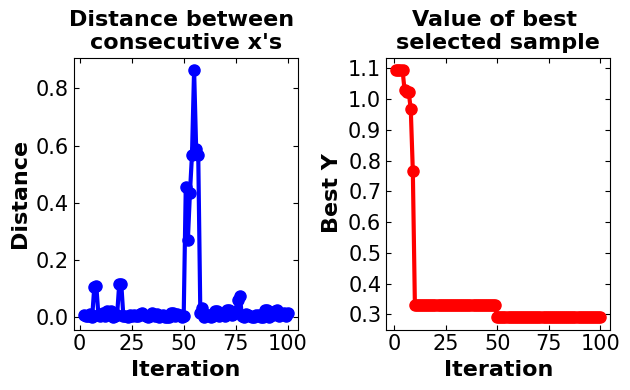

In [1608]:
# =============================================
# Step 5: Demonstrate the convergence plots
# =============================================
plot_converg_iter(np.array(X_bo_custom), np.array(-y_bo_custom), n_init=5)

### Discussion:

In the custom model generated Bayesian optimization, the number of iterations is set to 100, and in each iteration, 100 random samples are generated. The expected improvement is defined as an algorithm for the acquisition function. It is important to note that 5 samples are generated to initialize the algorithm. As this algorithm is developed to solve the maximization problem the objective function for maximization is utilized. The run time for performing the algorithm is approximately between 2.5 to 6s which is extremely good and it makes the algorithm efficient. The global optimum is captured by the algorithm between the points of (0.002, 0.06) and (0.007, 0.4) which is near the actual global optimum. Also, it is worth mentioning that the algorithm converges to the optimal point after approximately 25 iterations.

**!!! The algorithm is based on randomly generated samples. Therefore, after running the Notebook, you may get different results.**

## 4.	Libraries to Perform Bayesian Optimization

### 4.1. GpyOpt

GPyOpt is a Python open-source library for Bayesian Optimization developed by the Machine Learning group of the University of Sheffield. It is based on GPy, a Python framework for Gaussian process modeling. GpyOpt is able to automatically configure the models and Machine Learning algorithms and design the wet-lab experiments while saving time and money. Among other functionalities, GPyOpt can design experiments in parallel, use cost models and mix different types of variables in system designs. 

In [1609]:
# =============================================
# Import model-specific libraries 
# =============================================
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization
"""
Models description:
-----------------------------------
Src: https://gpyopt.readthedocs.io/en/latest/GPyOpt.methods.html
BayesianOptimization: main class to initialize a Bayesian Optimization method
1- f: function to optimize
2- domain: list of dictionaries containing the description of the inputs variables
3- Initial_design_numdata: number of initial points that are collected jointly
                           before start running the optimization
4- Acquisition_type: type of acquisition function to use. - ‘EI’, expected improvement. - 
                    ‘EI_MCMC’, integrated expected improvement (requires GP_MCMC model). - 
                    ‘MPI’, maximum probability of improvement. - 
                    ‘MPI_MCMC’, maximum probability of improvement (requires GP_MCMC model). - 
                    ‘LCB’, GP-Lower confidence bound. - 
                    ‘LCB_MCMC’, integrated GP-Lower confidence bound (requires GP_MCMC model).
"""
# start to capture the time (for runtime calculation)
t3 = time.time()
# define domain characteristics
bds = [{'name': 'X', 'type': 'continuous', 'domain': (-2, 2)}]
# start optimization using GpyOpt
# !!! the acquisition function and initial number of 
# points defined the same as the custom-developed BO model
# create model
gpy_bo = BayesianOptimization(f=objectivefunction, 
                              domain=bds,
                              acquisition_type ='EI',
                              initial_design_numdata=5)
# run the model
gpy_bo.run_optimization(max_iter=100)
t4 = time.time()
# calculate the runtime
Runtime = t4 - t3

In [1610]:
print("============================================\n")
# Get the optimal point using x_opt attribute
print("The optimal point is: ", gpy_bo.x_opt[0])
print("============================================\n")
# Get the optimal value using fx_opt attribute
print("The optimal value is: ", gpy_bo.fx_opt)
print("============================================\n")
# Report the runtime
print("Run time is: ", Runtime)
print("============================================\n")


The optimal point is:  -0.003514669698889943

The optimal value is:  0.4876386286568032

Run time is:  55.83359694480896



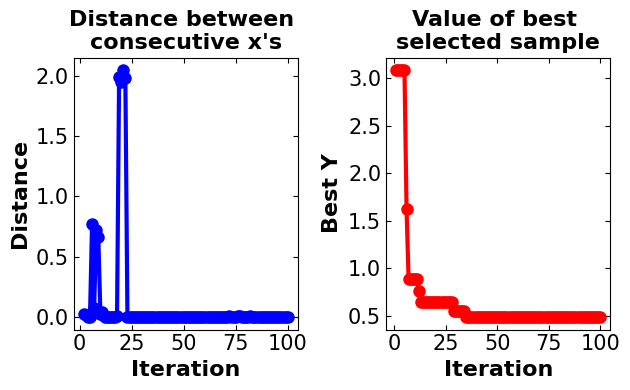

In [1611]:
# Demonstrate the convergence plots
plot_converg_iter(gpy_bo.X, gpy_bo.Y, n_init=5)

### Discussion

In the GpyOpt, all model characteristics are set to be the same as the BO custom model to make them comparable. As can be seen, the algorithm takes more steps until converging to the optimal point (more than 60 iterations). Also, when the model gets near the optimal point experiences a smaller distance. The interesting point about this model is the large runtime which makes it inefficient for such a simple model.

### 4.2. Scikit-Optimize

Scikit-optimize is a library for sequential model-based optimization that is based on Scikit-learn. It also supports Bayesian optimization using Gaussian processes. The API is designed around minimization, hence, we have to provide negative objective function values.

In [1612]:
# =============================================
# Import model-specific libraries 
# =============================================
from skopt import gp_minimize

"""
Models description:
-----------------------------------
Src: https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html#skopt.gp_minimize
BayesianOptimization: Bayesian optimization using Gaussian Processes.
1- func: callable, Function to minimize. Should take a single list of parameters and return the objective value.
2- n_calls: int, default: 100, Number of calls to func.
3- n_random_starts: int, default: None, Number of evaluations of func with random points before 
                    approximating it with base_estimator.
4- acq_func: string, default: "gp_hedge", Function to minimize over the gaussian prior. Can be either:
                              "LCB" for lower confidence bound.
                              "EI" for negative expected improvement.
                              "PI" for negative probability of improvement.
                              "gp_hedge" Probabilistically choose one of the above three acquisition 
                              functions at every iteration. 
                              "EIps" for negated expected improvement per second to take into account 
                              the function compute time. Then, the objective function is assumed to return two values, 
                              the first being the objective value and the second being the time taken in seconds.
                              "PIps" for negated probability of improvement per second. The return type of 
                              the objective function is assumed to be similar to that of "EIps"
5- noise: float, default: “gaussian”. Use noise=”gaussian” if the objective returns noisy observations. 
                              The noise of each observation is assumed to be iid with mean zero and a fixed variance.
                              If the variance is known before-hand, this can be set directly to the variance of the noise.
                              Set this to a value close to zero (1e-10) if the function is noise-free. 
                              Setting to zero might cause stability issues.
"""

# start to capture the time (for runtime calculation)
t5 = time.time()
# start optimization using ScikitOpt
# !!! the acquisition function and initial number of 
# points defined same as the custom developed BO model
# create and run the model
skopt_bo = gp_minimize(lambda x: objectivefunction(np.array(x))[0],  # the function to minimize
                  [(-2, 2)],      # the bounds on each dimension of x
                  acq_func="EI",  # the acquisition function
                  n_calls=100,    # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,)      # the noise level (optional)  


t6 = time.time()
# calculate the runtime
Runtime1 = t6 - t5

In [1613]:
print("============================================\n")
# Get the optimal point using x[0] attribute
print("The optimal point is: ", skopt_bo.x[0])
print("============================================\n")
# Get the optimal value using fun attribute
print("The optimal value is: ", skopt_bo.fun)
print("============================================\n")
# Report the runtime
print("Run time is: ", Runtime1)
print("============================================\n")


The optimal point is:  0

The optimal value is:  0.2715006871998069

Run time is:  32.40369367599487



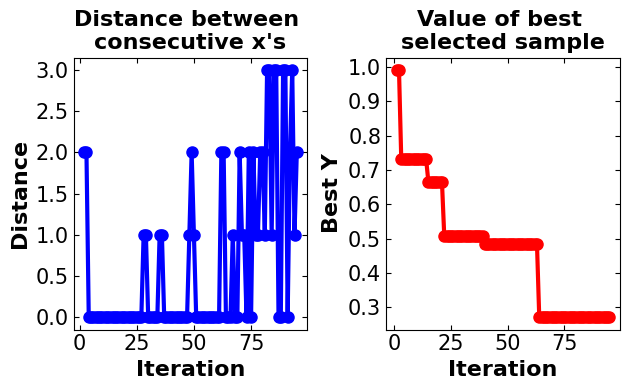

In [1614]:
# Demonstrate the convergence plots
plot_converg_iter(np.array(skopt_bo.x_iters), np.array(skopt_bo.func_vals), n_init = 5)

### Discussion

Same as GpyOpt, in the ScikitOpt model all parameters are set to be the same as the custom BO model to make it comparable. In the ScikiOpt, the model converges fast to the optimal point (in less than 25 iterations) and after 75 iterations, there is a minor change in the model results. The algorithm is also available to capture the global optimum with approximately good accuracy. After 25 iterations, oscillation is detected in model distances. The runtime of this model is also high in comparison with the custom-generated model.

### 4.3. Comparison Between the Results of the Custom BO Model, GpyOPT, and Scikit-Opt

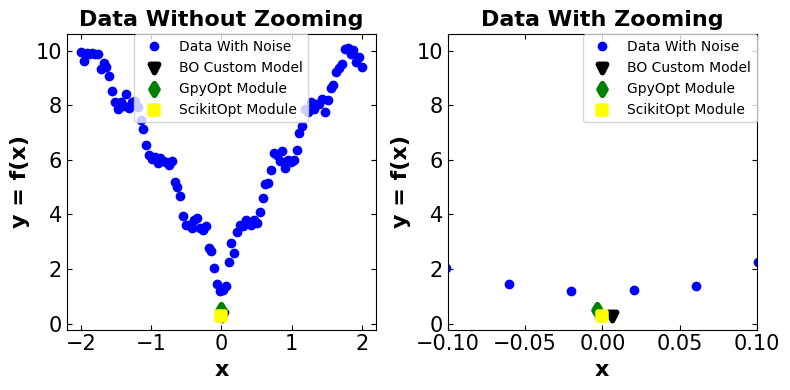

In [1615]:
# =============================================
# Providing a plot to compare BO custom model
# with the results of the commercial 
# package models
# =============================================
# Plot the observation
fig_compare = plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
# title
plt.title(('Data Without Zooming'), fontsize=16, fontweight='bold')
# plot data with noise
plt.plot(X_observed, y_observed, 'bo', linewidth=8, label='Data With Noise')
# plt.scatter(X_bo_custom, -y_bo_custom_predict, c='r')
plt.scatter(X_bo_custom[ix], -y_bo_custom[ix], marker = 'v', c = 'k', linewidth=4, label='BO Custom Model')
plt.scatter(gpy_bo.x_opt[0], gpy_bo.fx_opt, marker = 'd', c = 'g', linewidth=4, label='GpyOpt Module')
plt.scatter(skopt_bo.x[0], skopt_bo.fun, marker = 's', c = 'yellow', linewidth=4, label='ScikitOpt Module')
# define labels attributes
plt.xlabel('x', fontsize=16, fontweight='bold')
plt.ylabel('y = f(x)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
# adjust legends
plt.legend(fontsize=10, loc='upper center', borderaxespad=0)

plt.subplot(1, 2, 2)
# title
plt.title(('Data With Zooming'), fontsize=16, fontweight='bold')
# plot data with noise
plt.plot(X_observed, y_observed, 'bo', linewidth=8, label='Data With Noise')
# plt.scatter(X_bo_custom, -y_bo_custom_predict, c='r')
plt.scatter(X_bo_custom[ix], -y_bo_custom[ix], marker = 'v', c = 'k', linewidth=4, label='BO Custom Model')
plt.scatter(gpy_bo.x_opt[0], gpy_bo.fx_opt, marker = 'd', c = 'g', linewidth=4, label='GpyOpt Module')
plt.scatter(skopt_bo.x[0], skopt_bo.fun, marker = 's', c = 'yellow', linewidth=4, label='ScikitOpt Module')
# define labels attributes
plt.xlabel('x', fontsize=16, fontweight='bold')
plt.ylabel('y = f(x)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
plt.xlim([-0.1, 0.1])
# adjust legends
plt.legend(fontsize=10,borderaxespad=0)
plt.tight_layout()
plt.show()

| Approach | Optimal Point | Optimal Value |Run Time (s)|
| ----- | ----- | ----- | ----- |
| Custom BO Model |  ~0.0062 | ~0.2908 | ~5.7800 |
| GpyOpt |  ~-0.0035 | ~0.4876 | ~55.8335 |
| Scikit-Opt | ~0.0000 | ~0.2710 | ~32.4036 |

### Discussion:

**!!! It is important to note that the estimated results can differ by each time running this Jupyter Notebook. Therefore, the sign "~" has been put beside the results. Also, there should not be a major discrepancy between the results each time running the Jupyter Notebook.**

Main Observation Optimal Point: (0, 1.1772)

Comparing the results between three different algorithms and the main model all algorithms get close to the optimal point with some discrepancies. The existence of discrepancy considering the noisy model with lots of local optimum points is reasonable. Considering that all algorithms perform somehow well in capturing the optimal point, the parameter that differentiates between these three algorithms could be the model run time. The custom-generated BO model performs well by having a run time of 5.7800s. After that, Scikit-Opt and GpyOpt have second and third places, respectively. The first reason is that the custom-generated model skips lots of error-checking steps provided by other packages. This does not guarantee that the BO model performs well on other problems with more complex space or higher dimensions.

## 5. Advanced  Usage of Bayesian Optimization

### 5.1. Hyper-Parameter Tuning

Hyperparameter-tuning is the process of searching the most accurate hyperparameters for a dataset with a Machine Learning algorithm. To do this, we fit and evaluate the model by changing the hyperparameters one by one repeatedly until we find the best accuracy.


**What is the difference between a parameter and a hyperparameter?**

* **Model parameters**: These are the parameters that are estimated by the model from the given data. For example the weights of a deep neural network. 

* **Model hyperparameters**: These are the parameters that cannot be estimated by the model from the given data. These parameters are used to estimate the model parameters. For example, the learning rate in deep neural networks.

But the main question is that what is the efficient approach for tuning the hyper-parameters?

In general, there are four main approaches including:

1. Manual Search
2. Grid Search CV
3. Random Search CV
4. Bayesian Optimization



### 5.1.1 Manual Search

Manual hyperparameter tuning involves experimenting with different sets of hyperparameters manually i.e. each trial with a set of hyperparameters will be performed by you. This technique will require a robust experiment tracker which could track a variety of variables from images, and logs to system metrics.

### 5.1.2 Grid Search

In the grid search method, we create a grid of possible values for hyperparameters. Each iteration tries a combination of hyperparameters in a specific order. It fits the model on every combination of hyperparameters possible and records the model performance. Finally, it returns the best model with the best hyperparameters.

### 5.1.3 Random Search

In the random search method, we create a grid of possible values for hyperparameters. Each iteration tries a random combination of hyperparameters from this grid, records the performance, and lastly returns the combination of hyperparameters that provided the best performance.

![Grid vs Random Search](https://ndcbe.github.io/optimization/_images/contrib/Grid_vs_Random.png)

Image Source: Elyse Lee (2019), An Intro to Hyper-parameter Optimization using Grid Search and Random Search, Medium.com. [url](https://medium.com/@cjl2fv/an-intro-to-hyper-parameter-optimization-using-grid-search-and-random-search-d73b9834ca0a)

### 5.1.4 Bayesian Optimization

In the case of Hyper-Parameter tuning, there are lots of machine learning algorithms (our black-box problems) such as Descision-Trees, random forests, extreme gradient boosting (XGBoost), and deep neural networks which comprise lots of different types of Hyper-Parameters. Tuning such parameters can extremely impact the performance of the whole model. Some algorithms such as XGBoost (the one that is used in the further problem) and DNNs have many Hyper-Parameters that make the process of optimizing them a challenging task.

The Hyper-Parameter optimization problem can be defined as:

$$ \gamma^{(*)} = argmin_{\gamma \in \Delta} \Phi (\gamma) =argmin_{\gamma \in {\gamma^{(1)}, ..., \gamma^{(S)}}} \Phi (\gamma) \quad\quad	(19)$$

where $\Phi$ is the Hyper-Parameter response function, $\gamma$ defines the Hyper-Parameters, $\Delta$ is a search space, and ${\gamma^{(1)}, ..., \gamma^{(S)}}$ represents the trial points.

Hence, Hyper-Parameter optimization is defined as the minimization of $\Phi (\gamma)$ over $\gamma \in \Delta$.

As can be seen, the problem is the same as the one we had in the $1D$ BO approach. So, the problem can be solved using the following steps:

1. Define a prior measure such as Gaussian Process (GP)

2. Getting the posterior measure given some observation over the objective function by combining the likelihood and prior

3. Finding the next step using the loss function

However, solving such a problem is not an easy task for coding from scratch. For this reason, several developers have developed modules like HyperOpt, GpyOpt, and ScikitOpt to solve these problems.

### 5.1.5 Real-World Problem: Tuning HyperParameter in ML-Based Building Response Estimation Model Under an Earthquake

**Problem Definition**:

A multi-degree of freedom (MDOF) simplified 2D shear-building model combined with 222 ground motions ranging from 0.05g to 1.80 g peak ground accelerations are analyzed using OpenSeesPy. The nonlinearity of models is created using the inter-story hysteretic model proposed in HAZUS. methodology, considering the building type, number of stories, and construction year. Then, response-history analysis is conducted to generate a comprehensive dataset for machine learning algorithms. The proposed algorithm used ground motion as well as structural characteristics such as PGA, Sa (0.2s), Sa(1s), and Sa(T1), story height, story mass, and period as input variables to estimate the responses of different structures.

By performing several analyses, the XGboost Regression model performs better on the mentioned model. However, we still looking for improving the generated model using the hyperparameter tuning approaches.

**Goal: We are interested to perform both Random Search and Bayesian Optimization to find optimal Hyperparameters of the model.**

![Hyperparameter Tuning Example](https://ndcbe.github.io/optimization/_images/contrib/Hyper_Tuning_Model_problem.png)

### **Step 1:** Import required libraries

The first and foremost step to solving this question is importing the required libraries. For this specific problem, we require a Randomized search and cross-validation (provided by sci-kit learn), and XGBoost regressor library.

In [1619]:
# =============================================
# Importing all required libraries
# =============================================
import pandas as pd # Dataframe management
from scipy.stats import uniform # random data generation using Unifrom distribution
from xgboost import XGBRegressor # XGboost Resgressor for performing regression analysis and predicting model
from sklearn.preprocessing import MinMaxScaler # It is used to normalize data based on the minimum and maximum
from sklearn.model_selection import RandomizedSearchCV, cross_val_score # Baseline and model selection algorithm

### **Step 2:** Prepare the dataset

The dataset is provided on the GitHub repository and it can be imported using the following links. The data also can get extracted using the Pandas module.

It is important to note that there are several inputs that do not have any effect on the prediction model, therefore they are removed from the dataset (Data Cleaning).

In [1620]:
# =============================================
# Download the dataset
# =============================================
# Get the raw data from Github and extract its data using Pandas dataframe (read_csv) method
dataset = pd.read_csv("https://raw.githubusercontent.com/ParisaToofani/OptimizationJourney/main/OptimizationinDL/c2.csv")
# The mentioned columns are dropped from dataset for two reasons:
# 1. They do not have critical effect on the model and data
# 2. Reduce the dimensionality  of the model
dataset=dataset.drop(['#', 'seismicity', 'story_num', 'disp_dir1', 'react_dir1', 'Mass', 'Period', 'accel_dir1', 'disp_dir1', 'vel_dir1'], axis=1)
# In order to show the dataset we only need to call it down
dataset

,sa02,sa1,sat,pga,zi/h,Total height,drift_dir1
0,1.9294,0.7536,2.1144,0.5831,0.0,3.2,0.000000
1,0.2842,0.2023,0.2172,0.1395,0.0,3.2,0.000000
2,0.3191,0.3029,0.3062,0.1591,0.0,3.2,0.000000
3,0.8270,0.3352,1.0861,0.3378,0.0,3.2,0.000000
4,0.8847,0.3805,1.2538,0.5465,0.0,3.2,0.000000
...,...,...,...,...,...,...,...
19975,0.7142,0.5385,0.5041,0.3854,1.0,38.4,0.005181
19976,0.6358,0.4857,0.3770,0.3461,1.0,38.4,0.001399
19977,0.9575,0.2976,0.2387,0.4431,1.0,38.4,0.007332
19978,0.4173,0.1540,0.1221,0.1727,1.0,38.4,0.001016


### **Step 3:** Define a model

Here, the XGBoost model is utilized for performing the machine learning algorithm. The reason for utilizing such an algorithm is that XGBoost usually performs well on large-scale machine-learning problems on structured datasets. The second reason is that this algorithm can provide good accuracy compared to neural network approaches.

The main Hyper-Parameters of the XGBoost model for the regression task are:


$\eta$ (Learning Rate): Step size shrinkage used in the update to prevent overfitting. After each boosting step, we can directly get the weights of new features, and $\eta$ shrinks the feature weights to make the boosting process more conservative. The default value is 0.3 and accepts values between $[0, 1]$.

$\gamma$: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger $\gamma$ is, the more conservative the algorithm will be. The default value is 0.0 and accepts values between $(0, \infty]$.

Maximum depth: It defines the maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. The default value is 6.0 and accepts values between $[0, \infty]$.

Min-chile-weight: Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In a linear regression task, this simply corresponds to a minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be. The default value is 6.0 and accepts values between $[0, \infty]$.

n_estimators: The number of trees (or rounds) in an XGBoost model is specified to the XGBClassifier or XGBRegressor class in the n_estimators argument. The default in the XGBoost library is 100.


### **Step 4:** Data visualization

Before performing any machine learning task, it is important to have some visualization regarding the data. This can help to decide on various things like normalization, data extraction, and the best algorithm.

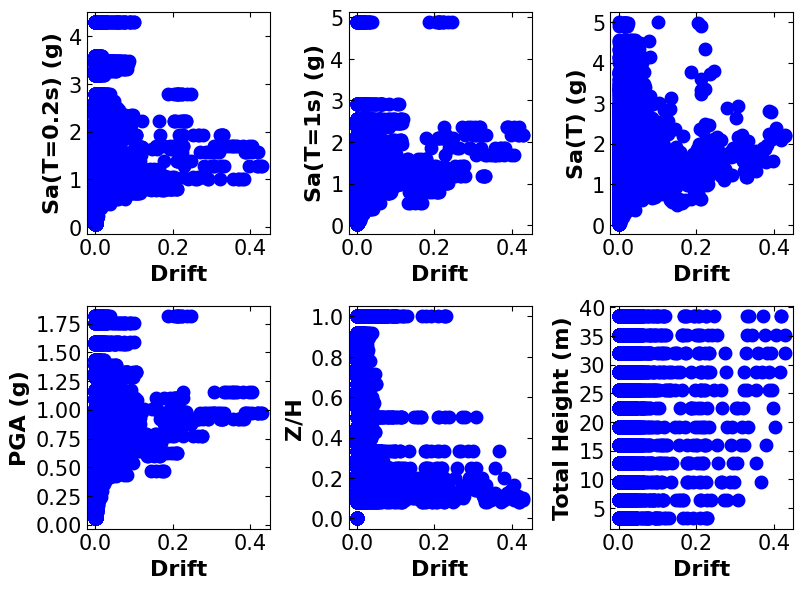

In [1642]:
# =============================================
# Visualizing model output regarding each model
# feature
# =============================================
# Plot the observation
# The standard plot size get modified to capture better visualization
fig_compare = plt.figure(figsize=(8, 6))
plt.subplot(2, 3, 1)
# plot data with respect to the Sa02
plt.scatter(dataset['drift_dir1'], dataset['sa02'], marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Drift', fontsize=16, fontweight='bold')
plt.ylabel('Sa(T=0.2s) (g)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
#------------------------------------------------------------------------------------
plt.subplot(2, 3, 2)
# plot data with respect to the Sa01
plt.scatter(dataset['drift_dir1'], dataset['sa1'], marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Drift', fontsize=16, fontweight='bold')
plt.ylabel('Sa(T=1s) (g)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
#------------------------------------------------------------------------------------
plt.subplot(2, 3, 3)
# plot data with respect to the Sa0t
plt.scatter(dataset['drift_dir1'], dataset['sat'], marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Drift', fontsize=16, fontweight='bold')
plt.ylabel('Sa(T) (g)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
#------------------------------------------------------------------------------------
plt.subplot(2, 3, 4)
# plot data with respect to the pga
plt.scatter(dataset['drift_dir1'], dataset['pga'], marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Drift', fontsize=16, fontweight='bold')
plt.ylabel('PGA (g)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
#------------------------------------------------------------------------------------
plt.subplot(2, 3, 5)
# plot data with respect to the zi/h
plt.scatter(dataset['drift_dir1'], dataset['zi/h'], marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Drift', fontsize=16, fontweight='bold')
plt.ylabel('Z/H', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
#------------------------------------------------------------------------------------
plt.subplot(2, 3, 6)
# plot data with respect to the Total height
plt.scatter(dataset['drift_dir1'], dataset['Total height'], marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Drift', fontsize=16, fontweight='bold')
plt.ylabel('Total Height (m)', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
plt.tight_layout()
plt.show()

### **Step 5:** Preparing Data

In [1621]:
# =============================================
# Preparing data
# =============================================
# Create an array of data for better data extraction
data = dataset.iloc[:, :].values
# Get the model input (the first 6 columns)
Xdata=data[:,:6]
# Get the model output (the last column)
ydata=data[:,6:]
# Normalizing data based on the minimum and maximum values
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
# Fitting data to scalar (inputs)
print(scaler_x.fit(Xdata))
# Transform data the get the scaled data
xscale=scaler_x.transform(Xdata)
# Fitting data to scalar (output)
print(scaler_y.fit(ydata))
# Transform data the get the scaled data
yscale=scaler_y.transform(ydata)

MinMaxScaler()
MinMaxScaler()


In [1622]:
# =============================================
# Splitting the data
# =============================================
# !!! This is a necessary  step to help us with prediction model evaluation
# 85% of data are used for model training and 15% of 
# data are used for further steps (model evaluation)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size = 0.15, random_state = 0)

### **Step 6:** Defining the baseline model

In this step, the XGBRegressor is utilized to create a model. It is important to note that the model is developed based on the default parameters. Also, the evaluation model here (the baseline) is defined based on the mean of the cross-validation score. The scoring parameter is also chosen as a negative mean squared error.

Here, a brief discussion is provided about the cross-validation score based on an article by Stephen Allwright.

Cross_val_score is a function in the Scikit-Learn package which trains and tests a model over multiple folds of your dataset. This cross-validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split. Cross_val_score is used as a simple cross-validation technique to prevent over-fitting and promote model generalization. The process that cross_val_score uses is typical for cross-validation and follows these steps:

* The number of folds is defined, by default, this is 5

* The dataset is split up according to these folds, where each fold has a unique set of testing data

* A model is trained and tested for each fold

* Each fold returns a metric for its test data

* The mean and standard deviation of these metrics can then be calculated to provide a single metric for the process

In [1623]:
# =============================================
# Instantiate an XGBRegressor with default
# hyperparameter settings
# =============================================
xgb = XGBRegressor()
# compute a baseline 
baseline = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error').mean()

### **Step 7:** Tuning Hyper-Parameters

In this step, we define a dictionary of Hyper-Parameters and their correspondent range (param-dist), or the list of dictionaries (bds) to utilize them in both random search and the "BayesianOptimization" model.

In [1624]:
# =============================================
# Hyper-parameter tuning using randomized search
# model
# =============================================
# Define the model hyperparameters and the range
# to be tuned
param_dist = {"learning_rate": uniform(0, 1),
              "gamma": uniform(0, 5),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10)}

# Perform random search task for 25 iterations
# Model data:
# Src: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# xgb: XGBoost regression model used for training data
# param_distributions: model hyper-parameters
# scoring: model evaluation metric
# n_iter: number of iterations
rs = RandomizedSearchCV(xgb, param_distributions=param_dist, 
                        scoring='neg_mean_squared_error', n_iter=25)

# Fitting the model structure to perform- 
# hyper-parameter tuning
rs.fit(X_train, y_train);

In [1645]:
# =============================================
# Model structure and parameters value after 
# performing Hyper-Parameter tuning
# =============================================
print("============================================\n")
print("The optimal learning rate is: ", 0.3195)
print("============================================\n")
print("The optimal gamma is: ", 0.4097)
print("============================================\n")
print("The optimal max_depth is: ", 20)
print("============================================\n")
print("The optimal n_estimators is: ", 101)
print("============================================\n")
print("The optimal min_child_weight is: ", 7)
print("============================================\n")
rs.best_estimator_


The optimal learning rate is:  0.3195

The optimal gamma is:  0.4097

The optimal max_depth is:  20

The optimal n_estimators is:  101

The optimal min_child_weight is:  7



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.40973497757318345, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.31952389742711895, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=101, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1627]:
# =============================================
# Hyper-parameter tuning using Bayesian Optimization
# =============================================
# Optimization objective 
def cv_score(parameters):
    """
    Define the objective function based on the cross-validation score
    Inputs:
        parameters: model hyper-parameters to be tuned 
    Outputs:
        cross-validation score   
    """
    # get the model parameters 
    parameters = parameters[0]
    # define a cross-validation score mode and calculate it
    score = cross_val_score(
                XGBRegressor(learning_rate=parameters[0],
                              gamma=parameters[1],
                              max_depth=int(parameters[2]),
                              n_estimators=int(parameters[3]),
                              min_child_weight = parameters[4]), 
                              X_train, y_train, scoring='neg_mean_squared_error').mean()
    # remodify a score
    score = np.array(score)
    return score

# Define the model hyperparameters and the range
# to be tuned
bds = [{'name': 'learning_rate', 'type': 'continuous', 'domain': (0, 1)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0, 5)},
        {'name': 'max_depth', 'type': 'discrete', 'domain': (1, 50)},
        {'name': 'n_estimators', 'type': 'discrete', 'domain': (1, 300)},
        {'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 10)}]


# Model data:
# Python package: GpyOpt
# f: objective function
# domain: model hyper-parameters boundaries
# model_type: surrogate model -> GP
# acquisition_type: expectation improvement
# acquisition_jitter: a small number added to avoid model instability ->0.05
# exact_feval: if True: it is assumed that cross-validation in Hyper-Parameter-
# space is deterministic
# maximize: optimization type
optimizer = BayesianOptimization(f=cv_score, 
                                 domain=bds,
                                 model_type='GP',
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.05,
                                 exact_feval=True, 
                                 maximize=True)

# Start running the model
# Maximum number of iterations is set to be 20,
# considering the number of initial points (default = 5)
# the maximum number of iterations is 25
optimizer.run_optimization(max_iter=20)

In [1649]:
# =============================================
# Hyper-parameters value after tuning  them using
# Bayesian optimization
# =============================================
hp_tunes_BO = optimizer.x_opt
print("============================================\n")
print("The optimal learning rate is: ", round(hp_tunes_BO[0], 4))
print("============================================\n")
print("The optimal gamma is: ", round(hp_tunes_BO[1], 4))
print("============================================\n")
print("The optimal max_depth is: ", hp_tunes_BO[2])
print("============================================\n")
print("The optimal n_estimators is: ", hp_tunes_BO[3])
print("============================================\n")
print("The optimal min_child_weight is: ", hp_tunes_BO[4])
print("============================================\n")


The optimal learning rate is:  0.165

The optimal gamma is:  0.0948

The optimal max_depth is:  50.0

The optimal n_estimators is:  300.0

The optimal min_child_weight is:  1.0



###  **Step 8:** Results and discussion

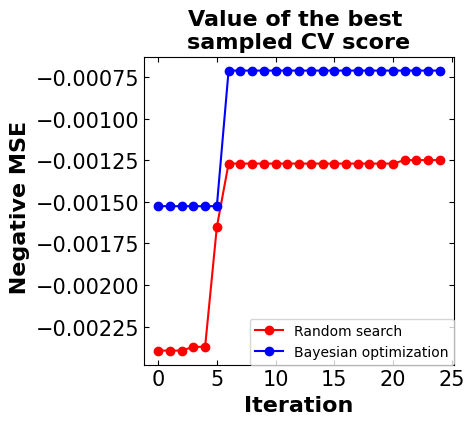

Baseline  MSE = -0.00061
Random search  MSE = -0.00125
Bayesian optimization  MSE = -0.00071


In [1653]:
# =============================================
# The plot of negative mean squared variation 
# per iteration considering both algorithms
# =============================================
y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])
y_bo = np.maximum.accumulate(-optimizer.Y[:]).ravel()
# start plotting
fig_compare_tuning = plt.figure(figsize=(4, 4))
# title
plt.title(('Value of the best \n'
           'sampled CV score'), fontsize=16, fontweight='bold');
# plot random search results
plt.plot(y_rs, 'ro-', label='Random search')
# plot Bayesian optimization results
plt.plot(y_bo, 'bo-', label='Bayesian optimization')
# define labels attributes
plt.xlabel('Iteration', fontsize=16, fontweight='bold')
plt.ylabel(' Negative MSE', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
plt.legend(fontsize=10, loc='lower right', borderaxespad=0)
plt.show()
print(f'Baseline  MSE = {baseline:.5f}')
print(f'Random search  MSE = {y_rs[-1]:.5f}')
print(f'Bayesian optimization  MSE = {y_bo[-1]:.5f}')

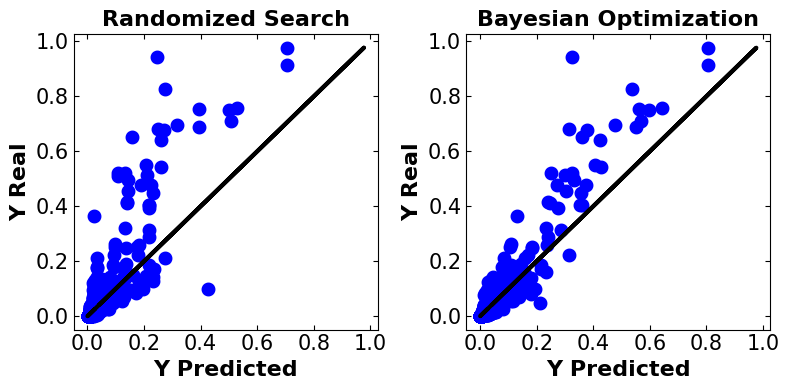

In [1658]:
# =============================================
# the models' prediction
# =============================================
# find the predicted values using random search
y_predict_rs = rs.predict(X_test)
# find the predicted values using Bayesian optimization
# In the Bayesian optimization approach we need to reconstruct the model
model_bo = XGBRegressor(learning_rate=optimizer.x_opt[0],
                              gamma=optimizer.x_opt[1],
                              max_depth=int(optimizer.x_opt[2]),
                              n_estimators=int(optimizer.x_opt[3]),
                              min_child_weight = optimizer.x_opt[4], )
model_bo.fit(X_train, y_train)
y_predict_bo = model_bo.predict(X_test)
# -------------------------------------------------------------------------
# Plot the observation
fig_compare = plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
# title
plt.title(('Randomized Search'), fontsize=16, fontweight='bold')
# plot data predicted values versus actual data
plt.plot(y_test, y_test, 'k', linewidth=3)
plt.scatter(y_predict_rs, y_test, marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Y Predicted', fontsize=16, fontweight='bold')
plt.ylabel('Y Real', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

plt.subplot(1, 2, 2)
# title
plt.title(('Bayesian Optimization'), fontsize=16, fontweight='bold')
# plot data predicted values versus actual data
plt.plot(y_test, y_test, 'k', linewidth=3)
plt.scatter(y_predict_bo, y_test, marker = 'o', c = 'b', linewidth=4)
# define labels attributes
plt.xlabel('Y Predicted', fontsize=16, fontweight='bold')
plt.ylabel('Y Real', fontsize=16, fontweight='bold')
# adjust tick sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
plt.tight_layout()
plt.show()

### Discussion

Before starting the discussion here is some information regarding the evaluation metrics.

Mean Squared Error (MSE) is a commonly used metric for evaluating the performance of regression models. It measures the average of the squared differences between the predicted and actual values of the target variable.

Negative Mean Squared Error (NMSE) is simply the negation of the MSE. In other words, it's the negative value of the average of the squared differences between the predicted and actual values of the target variable.

The reason for using the negative value of MSE is mainly for mathematical conveniences, such as when minimizing an objective function. By negating the MSE, we can treat the optimization problem as a maximization problem, which can sometimes be easier to solve or interpret.

First, the NMSE values in tuned models are near zero. This means the model is performing well while can make a risk of overfitting.

Second, the NMSE values of the model are lower than that of the baseline model, this indicates that the models are performing better.

## 6. Further Studies (Bayesian Multi-Objective Optimization)

Bayesian multi-objective optimization is a framework for optimizing multiple objective functions simultaneously while accounting for uncertainty. The objective is to identify a set of solutions that approximate the Pareto front, which represents the set of non-dominated solutions that achieve the best trade-offs between the different objectives.

The Bayesian approach involves constructing a probabilistic model of the objective functions and constraints, which can be represented as follows:

$$f(x) \sim GP(m(x), k(x,x')) \quad \quad (20)$$
$$g(x) \sim Bernoulli(p(x)) \quad \quad (21)$$

where GP denotes a Gaussian process, $m(x)$ is the mean function, $k(x,x')$ is the covariance function, and p(x) is the probability of the constraints being satisfied.

Given this probabilistic model, Bayesian multi-objective optimization involves iteratively selecting the next input x to evaluate based on an acquisition function that balances exploration and exploitation and updating the model with the new observation. The acquisition function can be defined based on different criteria, such as expected improvement, probability of improvement, or hypervolume.

The iterative process continues until a stopping criterion is met, such as a maximum number of evaluations or convergence to a satisfactory Pareto front approximation. The final set of solutions X* represents a set of non-dominated solutions that achieve the best trade-offs between the different objectives.

There are several variations of Bayesian multi-objective optimization, such as constrained multi-objective optimization, where constraints are explicitly considered in the optimization process, and multi-objective Bayesian optimization with preferences, where the user's preferences are incorporated into the optimization process.

Bayesian multi-objective optimization has numerous applications in various fields, including:

* Engineering design: optimization of complex systems with multiple objectives, such as minimizing weight, cost, and energy consumption while maximizing performance.

* Finance: portfolio optimization to maximize returns while minimizing risk.

* Machine learning: hyperparameter tunings of machine learning models, such as selecting the optimal regularization parameter, learning rate, or architecture.

* Environmental management: optimization of water resources management, energy planning, and land use management.

* Healthcare: optimization of treatment plans for patients with multiple health conditions, such as cancer patients with multiple tumors.

* Robotics: optimization of robot control policies to achieve multiple objectives, such as maximizing task performance and minimizing energy consumption.

Here are some key papers and resources on Bayesian multi-objective optimization:

* "Bayesian Multi-Objective Optimization" by Hernández-Lobato et al. (2016) presents a comprehensive overview of Bayesian multi-objective optimization, including the formulation of the problem, the different approaches and algorithms that have been proposed, and their applications in different fields.

* "Bayesian multi-objective optimization with preference articulation" by Hernandez-Lobato et al. (2017) introduces a new approach that allows the incorporation of preferences into the optimization process, allowing the user to guide the search towards solutions that better meet their preferences.

* "BOCS: Bayesian optimization for constrained multi-objective optimization problems" by Li et al. (2018) proposes an algorithm that can handle constrained multi-objective optimization problems by using a constrained acquisition function that takes into account both the feasibility and the quality of the solutions.

* "Bayesian multi-objective optimization using Gaussian processes, preference modeling, and parallelization" by Cremers et al. (2021) presents an approach that combines preference modeling, parallelization, and Bayesian optimization with Gaussian processes to efficiently solve multi-objective optimization problems with complex and high-dimensional search spaces.

* The MOBOpt library (https://github.com/numbbo/coco/blob/master/code-experiments/bbob/python/mocobbo.py) provides a collection of multi-objective optimization problems and algorithms, including Bayesian optimization approaches.

Overall, Bayesian multi-objective optimization is a powerful and flexible framework for optimizing multiple objectives simultaneously while accounting for uncertainty. It has been widely used in many fields, including engineering design, finance, and machine learning.

## 7. Conclusion

* Bayesian optimization is one of the powerful approaches to optimize the objective function that usually takes a long time (minutes or hours) to evaluate.

* Bayesian optimization plays a key role in optimizing nonparametric models like machine learning algorithms.

* Currently, there are various packages to perform Bayesian optimization like GpyOpt, ScikitOpt, and Hyperopt. But when it comes to models that are not complex, these packages are not necessarily efficient. In this case, sometimes custom-developed functions perform better.

* There are various applications for using Bayesian optimization. Among all of them, hyper-parameter tuning is of importance. Bayesian optimization helps to find the best model parameters to develop a better prediction model.

* Finally, Bayesian optimization approaches are still evolving. For instance, Bayesian multi-objective optimization has been recently used as a promising approach for solving multi-objective optimization problems efficiently. This field is still evolving, and new approaches and algorithms are being proposed to improve its effectiveness and applicability.

## References

**Publications:**

1. Frazier, P. I. (2018). A tutorial on Bayesian optimization. arXiv preprint arXiv:1807.02811.

2. Shahriari, B., Swersky, K., Wang, Z., Adams, R. P., & De Freitas, N. (2015). Taking the human out of the loop: A review of Bayesian optimization. Proceedings of the IEEE, 104(1), 148-175.

3. Jones, D. R., Schonlau, M., & Welch, W. J. (1998). Efficient global optimization of expensive black-box functions. Journal of Global optimization, 13(4), 455.

4. Brochu, E., Cora, V. M., & De Freitas, N. (2010). A tutorial on Bayesian optimization of expensive cost functions, with application to active user modeling and hierarchical reinforcement learning. arXiv preprint arXiv:1012.2599.

5. Putatunda, S., & Rama, K. (2019, December). A modified bayesian optimization based hyper-parameter tuning approach for extreme gradient boosting. In 2019 Fifteenth International Conference on Information Processing (ICINPRO) (pp. 1-6). IEEE.

**Websites:**

1. https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7

2. https://machinelearningmastery.com/what-is-bayesian-optimization/

3. https://distill.pub/2020/bayesian-optimization/

4. http://krasserm.github.io/2018/03/21/bayesian-optimization/

5. https://towardsdatascience.com/hyperopt-hyperparameter-tuning-based-on-bayesian-optimization-7fa32dffaf29

6. https://stephenallwright.com/cross_val_score-sklearn/


## Appendix A. Required Packages and Installation Tips

**The project is implemented in the Anaconda environment and Jupyter notebook.**

For installing Anaconda following link is provided:

https://www.anaconda.com/download/

**!!! Important point: the following notebook can be implemented in the Colab, however there are some bugs in the module named "Scikit-Optimize".
If any error faced, probably a developement version of this package can solve the problem.**

Also, following packages are necessary to install:

GPy==1.10.0

GPyOpt==1.2.6

ipykernel 

ipython 

ipython-genutils 

matplotlib==3.6.3

matplotlib-inline 

scikit-image 

scikit-learn 

scikit-learn-intelex

scikit-optimize==0.9.0

scipy==1.10.0

hyperopt==0.2.7